Подключим датасет:

In [811]:
import pandas as pd
import numpy as np

In [812]:
data = pd.read_csv('dataset.csv')

In [813]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 21 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Отметка времени                                                                                                          35 non-null     object 
 1   Итоговая оценка за экзамен по ТОЭ                                                                                        34 non-null     float64
 2   С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)      34 non-null     float64
 3   Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?  35 non-null     int64

In [814]:
data[:5]

,Отметка времени,Итоговая оценка за экзамен по ТОЭ,"С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)","Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?",Оценка по физике в школе,Оценка по физике в последнем семестре?,Оценка за ИДЗ по ТОЭ за семестр,Оценка по лабораторным ТОЭ,Вели конспект по занятиям? (лекции и/или практики),Выходили к доске на практике?,...,В течении предыдущего семестра были трудоустроены и/или проходили стажировку?,"Если работали/проходили стажировку, то какая ставка (загрузка):",Где проживаете?,"Есть кот дома? (в месте, где сейчас живете)",Есть родной брат/сестра?,Гражданство,Сколько в среднем играли в прошлом семестре? Укажите число в часах,Была ли стипендия в 3 семестре?,Оцените свое ментальное здоровье в прошлом семестре,"Оцените, насколько были истощены (уставши) к началу сессии"
0,2024/09/30 11:51:10 PM GMT+3,5.0,1.0,75,5,5.0,5.0,5.0,да,да,...,нет,0.00,общежитие 8,нет,да,KAZ,10,да,9,1
1,2024/09/30 11:53:32 PM GMT+3,3.0,1.0,75,4,5.0,4.0,5.0,да,нет,...,нет,0.00,дома,нет,да,RUS,20,нет,7,6
2,2024/09/30 11:53:33 PM GMT+3,3.0,1.0,75,5,4.0,5.0,5.0,да,нет,...,да,0.25,дома,да,да,RUS,168,да,7,3
3,2024/09/30 11:57:50 PM GMT+3,3.0,1.0,75,5,4.0,4.0,4.0,нет,нет,...,да,0.50,общежитие 8,нет,да,KAZ,18,нет,7,2
4,2024/09/30 11:59:56 PM GMT+3,4.0,1.0,100,4,3.0,4.0,5.0,нет,нет,...,нет,NaN,дома,нет,да,RUS,20,нет,10,5


# Обработаем данные:

Приведем к буловским и интовским значениям:

In [815]:
def get_bool(item):
    if item == 'да':
        return 1.
    if item == 'нет':
        return 0.
    try:
        return float(item)
    except:
        return item

In [816]:
data = data.applymap(get_bool)

C:\Users\Filic\AppData\Local\Temp\ipykernel_25540\239286839.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(get_bool)


Проиндексируем текстовые поля:

In [817]:
def lets_index (data: pd.DataFrame, columns):
    for col in columns:
        unique_list = sorted(data[col].unique())
        index_dict = dict(zip(unique_list, range(len(unique_list))))

        data[col] = data[col].map(lambda item: float(index_dict[item]))
    return data

In [818]:
data = lets_index(data, ['Где проживаете?', 'Гражданство'])

Дропнем безсмысленные данные:

In [819]:
data = data.drop(columns=['Отметка времени'])

In [820]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 20 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Итоговая оценка за экзамен по ТОЭ                                                                                        34 non-null     float64
 1   С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)      34 non-null     float64
 2   Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?  35 non-null     float64
 3   Оценка по физике в школе                                                                                                 35 non-null     float

Отредоктируем кривые данные в 'Сколько в среднем играли в прошлом семестре? Укажите число в часах ':

In [821]:
def get_game_time(item):
    try:
        return float(item)
    except:
        return np.NAN

In [822]:
data['Сколько в среднем играли в прошлом семестре? Укажите число в часах'] = data['Сколько в среднем играли в прошлом семестре? Укажите число в часах'].map(get_game_time)

In [823]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 20 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Итоговая оценка за экзамен по ТОЭ                                                                                        34 non-null     float64
 1   С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)      34 non-null     float64
 2   Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?  35 non-null     float64
 3   Оценка по физике в школе                                                                                                 35 non-null     float

Укоротим columns:

In [824]:
columns = data.columns

In [825]:
columns = [
       'оценка за экзамен',
       'количество попыток',
       'процент посещений',
       'Оценка по физике в школе', 
       'Оценка по физике в вузе',
       'Оценка за ИДЗ за семестр ', 
       'Оценка по лабораторным',
       'конспект',
       'Выходили к доске',
       'Оценка за последнюю кр',
       'работа',
       'рабочая ставка',
       'Где проживает', 
       'кот',
       'Есть родной брат/сестра?', 
       'Гражданство',
       'игровые часы',
       'стипендия',
       'ментальное здоровье',
       'истощение'
       ]

In [826]:
data.columns = columns

Заменим Nan на средние значение:

In [827]:
data = data.dropna(subset=['оценка за экзамен'])

In [828]:
data = data.fillna(data.mean())

# Получим карту кореляции:

In [829]:
import matplotlib.pyplot as plt
import seaborn as sns

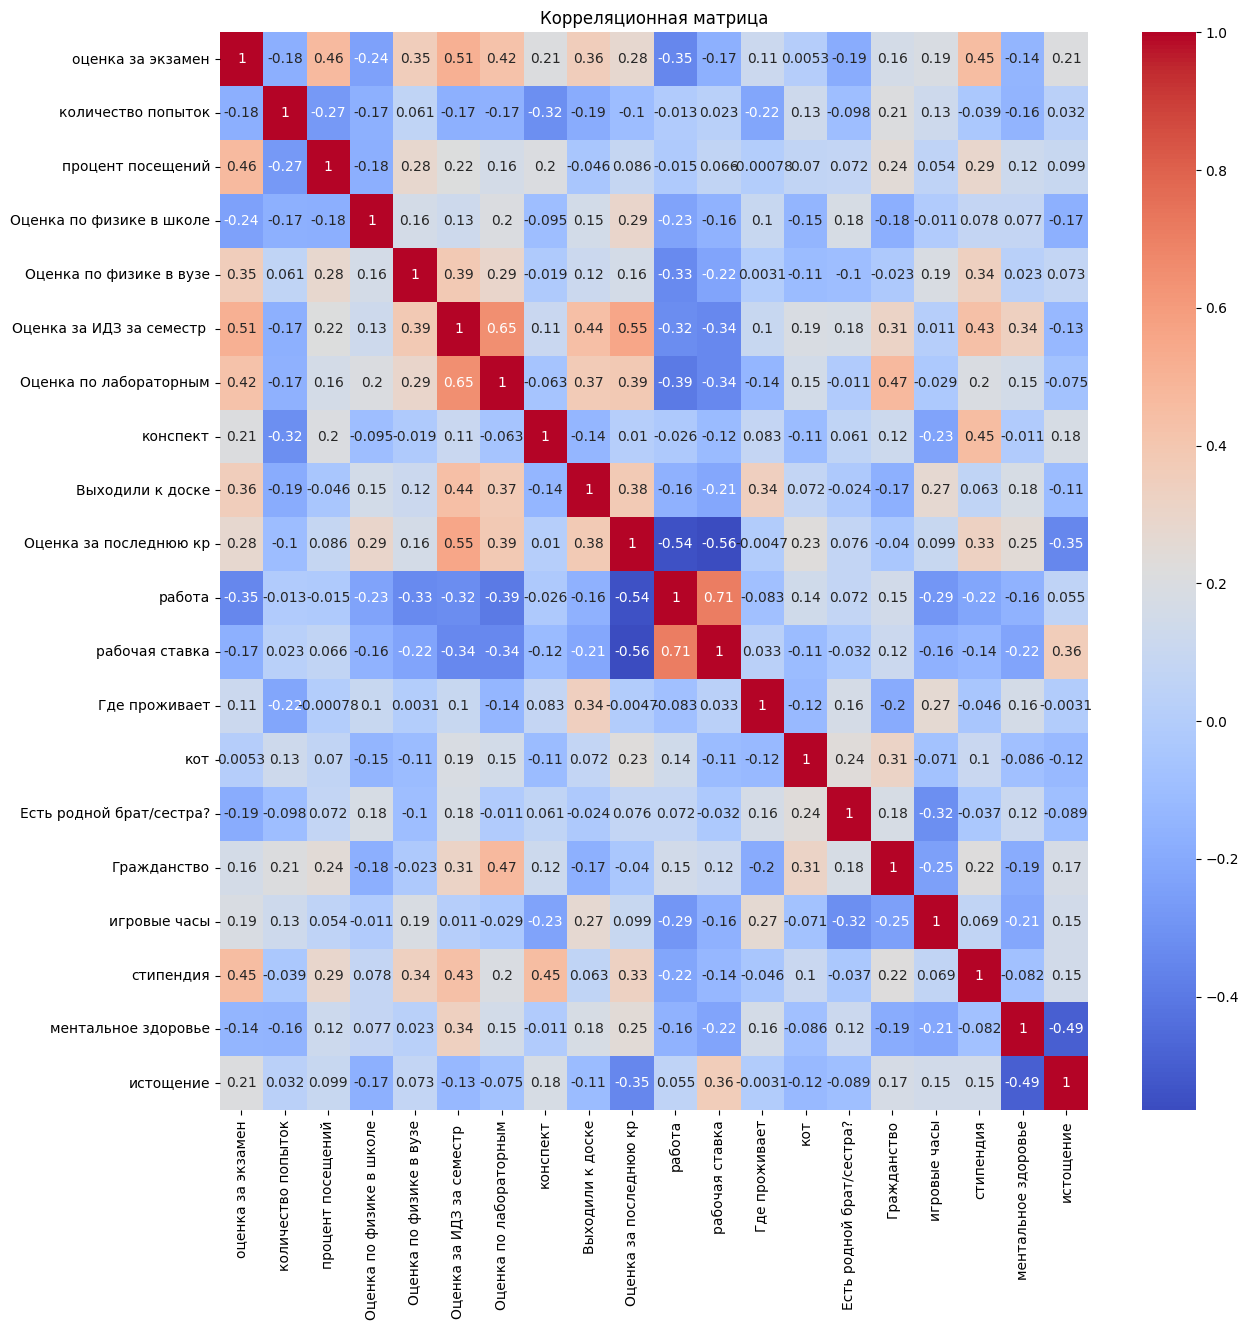

In [830]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# Исключим избыточность датасета

Заметим:
- Оценки по лабам и идз силько корелируют (так что можно выкинуть оценки по лабам)
- Наличие кота вообще не влияет (Жалко что котики слабо помогали с ментальным здоровьем 😢)
- Наличие работы и ставки очень сильно корелируют (Уберем ставку)


In [831]:
data = data.drop(columns = ['кот', 'Оценка по лабораторным', 'рабочая ставка'])

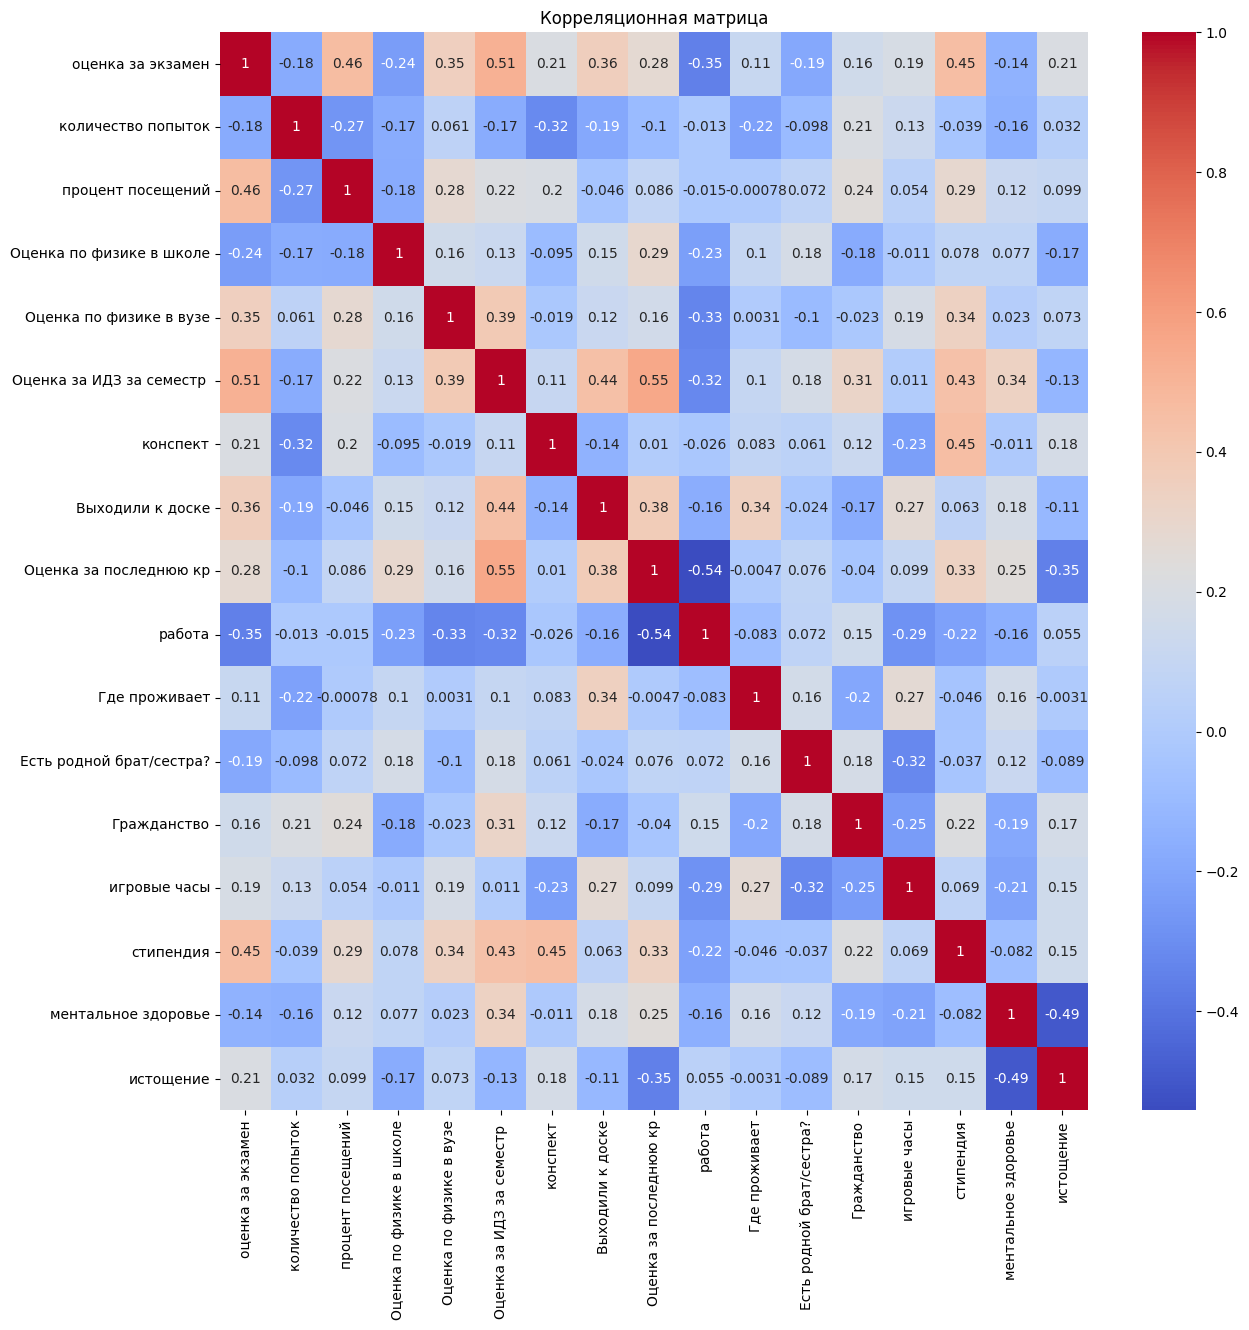

In [832]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [833]:
columns = data.columns

# Разабьем датасет:

In [834]:
from sklearn.model_selection import train_test_split

In [835]:
train, test, train_lable, test_lable = train_test_split(data[data.columns[1:]].to_numpy(), data[data.columns[0]].to_numpy(), train_size=0.7, random_state= 76)

# Реализуем свою модель набазе pyTorch:

In [836]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [837]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

напишем клас Dataset:

In [838]:
class MyDataset(torch.utils.data.Dataset):
    """Some Information about MyDataset"""
    def __init__(self, data_, lable):
        super(MyDataset, self).__init__()
        self.data = data_
        self.lable = lable

        class_list = sorted(data[data.columns[0]].unique().astype(str))
        self.class_dict = dict(zip(class_list, range(len(class_list))))

    def __getitem__(self, index):
        X = np.array(self.data[index], dtype=np.float32)
        lable = self.class_dict[str(self.lable[index])]
        return X, lable

    def __len__(self):
        return len(self.lable)

In [839]:
train_dataset = MyDataset(train, train_lable)

Реализуем модель:

In [840]:
class Net(nn.Module):
    """Some Information about Net"""
    def __init__(self, input_, output_class):
        super(Net, self).__init__()
        self.pipe = nn.Sequential(
            nn.Linear(input_, 100),
            nn.ReLU(),

            nn.Linear(100, 500),
            nn.ReLU(),
            
            nn.Linear(500, 50),
            nn.ReLU(),
            
            nn.Dropout(0.5),

            nn.Linear(50, output_class),
        )

    def forward(self, x):
        x= self.pipe(x)
        return x

In [841]:
model = Net(
    len(columns)-1, 
    len(data[data.columns[0]].unique())
)

model.to(device)

Net(
  (pipe): Sequential(
    (0): Linear(in_features=16, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=50, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=50, out_features=3, bias=True)
  )
)

Подгрузим данные в dataloader:

In [842]:
batch = 1

In [843]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch, shuffle=True)

Обучим модель:

In [844]:
from tqdm import tqdm

In [845]:
def train(epoch, model, optimizer, criterion, dataloader, save = False):
    model.train()
    # loop over the dataset multiple times
    for epoch in range(epoch):
        running_loss = 0.0
        for datainp in (pdbar := tqdm(dataloader)):
            inputs, labels = datainp
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            pdbar.set_description(f'epoch: {epoch}\tloss: {running_loss:.3F}')
        if save:
            torch.save(model, f'./saves/my_model_epoch_{epoch}.pth')
        if running_loss < 15.:
                break
    print('Finished Training')
    model.eval()

In [846]:
train_check = True

epoch = 100
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
criterion = nn.CrossEntropyLoss()

In [847]:
if train_check:
    train(epoch, model, optimizer, criterion, train_dataloader)

epoch: 99	loss: 22.528: 100%|██████████| 23/23 [00:00<00:00, 198.77it/s]

Finished Training


Протестируем:

In [848]:
test_dataset = MyDataset(data[data.columns[1:]].to_numpy(), data[data.columns[0]].to_numpy())

In [849]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch, shuffle=True)

In [850]:
def test(model, dataloader):
    acc = 0.
    loss = 0.
    with torch.no_grad():
        for datainp in (pdbar := tqdm(dataloader)):
            inputs, labels = datainp
            inputs = inputs.to(device)
            labels = labels.to(device)

            output = model(inputs)
            _, out = torch.max(output, 1)
            if out == labels:
                acc+=1
            else:
                loss+=1
            pdbar.set_description(f'acc: {acc/(loss+acc)*100:.3F}%\tloss: {loss}')

In [853]:
test(model, test_loader)

acc: 47.059%	loss: 18.0: 100%|██████████| 34/34 [00:00<00:00, 170.01it/s]
